<a href="https://colab.research.google.com/github/stefan-stein/NLP_with_TF_2.0/blob/master/NLP_with_TF_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

These are my notes for the "Natural Language Processing with Tensorflow  2 - Beginner's course" that can be found [here](https://www.youtube.com/watch?v=B2q5cRJvqI8). Colab currently still imports tensorflow 1.x by default, so we need to select version 2.x explicitly.

In [1]:
import io
import matplotlib.pyplot as plt
# Make sure we are importing TF 2.x
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

TensorFlow 2.x selected.


In [2]:
print(tf.__version__)

2.1.0


We are going to analyse the IMDB moview review dataset. From the TensorFlow datasets [website](https://www.tensorflow.org/datasets/catalog/imdb_reviews#imdb_reviewssubwords8k):
> Large Movie Review Dataset. This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing.

We import the 'subwords8k' version, which is to say we use a vocabulary size of 8k. The other options passed to the `tfds.load()` function are `as.supervised=True`, meaning we im

In [3]:
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k',
                                          split = (tfds.Split.TRAIN, tfds.Split.TEST),
                                          with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteW3V37J/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteW3V37J/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteW3V37J/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
encoder = info.features['text'].encoder

In [8]:
print(encoder.subwords[:20])

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_']


Reviews are not all of the same length. Hence, we find the longest review and add padding to all other reviews to make all reviews of the same lenght.

In [0]:
padded_shapes = ([None], ())
# shuffle data, use batch size of 10
train_bataches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
test_bataches = test_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)

Next, we build a model. As is typical with Keras, it is a sequential model. Our first layer is an embedding layer, using the `vocab_size` attribute of the `encoder` object defined above. We pick the latent space dimansion for the embedding and choose `16` to start with. The last layer is a dense layer with output dimension 1 and `'sigmoid'` activation function, i.e. it gives out a number between zero and one corresponding to the probability that the review is positive.

In [0]:
embedding_dim = 16
model = keras.Sequential([
                    layers.Embedding(encoder.vocab_size, embedding_dim),
                    layers.GlobalAveragePooling1D(),
                    layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_bataches, epochs=10, validation_data=test_bataches,
                    validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 25s 10ms/step - loss: 0.6352 - accuracy: 0.6910 - val_loss: 0.5731 - val_accuracy: 0.7950
Epoch 2/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.4632 - accuracy: 0.8372 - val_loss: 0.4590 - val_accuracy: 0.8200
Epoch 3/10
2500/2500 [==============================] - 16s 6ms/step - loss: 0.3623 - accuracy: 0.8783 - val_loss: 0.3954 - val_accuracy: 0.8600
Epoch 4/10
2500/2500 [==============================] - 17s 7ms/step - loss: 0.3110 - accuracy: 0.8949 - val_loss: 0.3783 - val_accuracy: 0.8550
Epoch 5/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.2773 - accuracy: 0.9062 - val_loss: 0.3358 - val_accuracy: 0.8750
Epoch 6/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.2504 - accuracy: 0.9161 - val_loss: 0.3422 - val_accuracy: 0.8550
Epoch 7/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.2321 - accuracy: 0.9228 - val_loss: 0.2579 - val_a

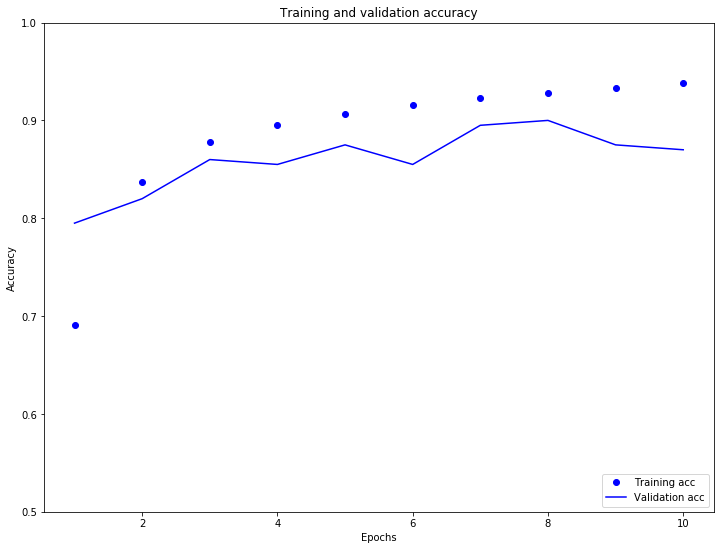

In [15]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
# blue dots
plt.plot(epochs, acc, 'bo', label = 'Training acc')
# just blue line
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()